# Challenge 5: Structural Analysis Dashboard

## Task: Create a comprehensive analysis dashboard

### Requirements:
1. Create 2x2 subplot layout
2. Subplot 1: Load-displacement curve (matplotlib)
3. Subplot 2: Material strength distribution (seaborn histogram)
4. Subplot 3: Correlation heatmap of structural properties
5. Subplot 4: Stress distribution contour plot
6. Add overall title and proper spacing
7. Use both matplotlib and seaborn in the same figure

**First team to show the comprehensive dashboard wins Challenge 5!** 🏆


In [9]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

# Set seaborn style for professional appearance
sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'

# Set random seed for reproducible results
np.random.seed(42)

print("📚 Libraries imported successfully!")
print("🔧 Setting up structural analysis dashboard...")
print("🏗️ Generating comprehensive structural data...")


📚 Libraries imported successfully!
🔧 Setting up structural analysis dashboard...
🏗️ Generating comprehensive structural data...


In [10]:
# Generate comprehensive structural data for all subplots

# 1. Load-Displacement Data (Subplot 1)
displacement = np.linspace(0, 10, 100)
load = 50 * displacement - 2 * displacement**2

# 2. Material Strength Data (Subplot 2)
steel_strength = np.random.normal(50, 5, 200)
concrete_strength = np.random.normal(30, 3, 200)
composite_strength = np.random.normal(40, 4, 200)

# Combine material data for histogram
all_strengths = np.concatenate([steel_strength, concrete_strength, composite_strength])
material_labels = ['Steel'] * 200 + ['Concrete'] * 200 + ['Composite'] * 200

# 3. Structural Properties Data for Correlation (Subplot 3)
n_samples = 100
structural_data = {
    'Load_Capacity': np.random.normal(100, 15, n_samples),
    'Deflection': np.random.normal(5, 1.5, n_samples),
    'Stress': np.random.normal(25, 4, n_samples),
    'Strain': np.random.normal(0.002, 0.0005, n_samples),
    'Modulus': np.random.normal(200000, 20000, n_samples),
    'Safety_Factor': np.random.normal(2.5, 0.3, n_samples)
}

# Create correlations between properties
structural_data['Load_Capacity'] = structural_data['Stress'] * 4 + np.random.normal(0, 5, n_samples)
structural_data['Deflection'] = structural_data['Load_Capacity'] / 20 + np.random.normal(0, 0.5, n_samples)
structural_data['Strain'] = structural_data['Stress'] / structural_data['Modulus'] + np.random.normal(0, 0.0001, n_samples)

df_structural = pd.DataFrame(structural_data)

# 4. Stress Distribution Data for Contour Plot (Subplot 4)
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)

# Create stress distribution (circular pattern with some asymmetry)
stress_distribution = 30 * np.exp(-(X**2 + Y**2) / 8) + 10 * np.exp(-((X-1)**2 + (Y-1)**2) / 4)

print("✅ All structural data generated successfully!")
print(f"   Load-displacement points: {len(displacement)}")
print(f"   Material strength samples: {len(all_strengths)}")
print(f"   Structural properties samples: {len(df_structural)}")
print(f"   Stress distribution grid: {X.shape}")


✅ All structural data generated successfully!
   Load-displacement points: 100
   Material strength samples: 600
   Structural properties samples: 100
   Stress distribution grid: (50, 50)


🏗️ Creating comprehensive structural analysis dashboard...
📊 Setting up 2x2 subplot layout...


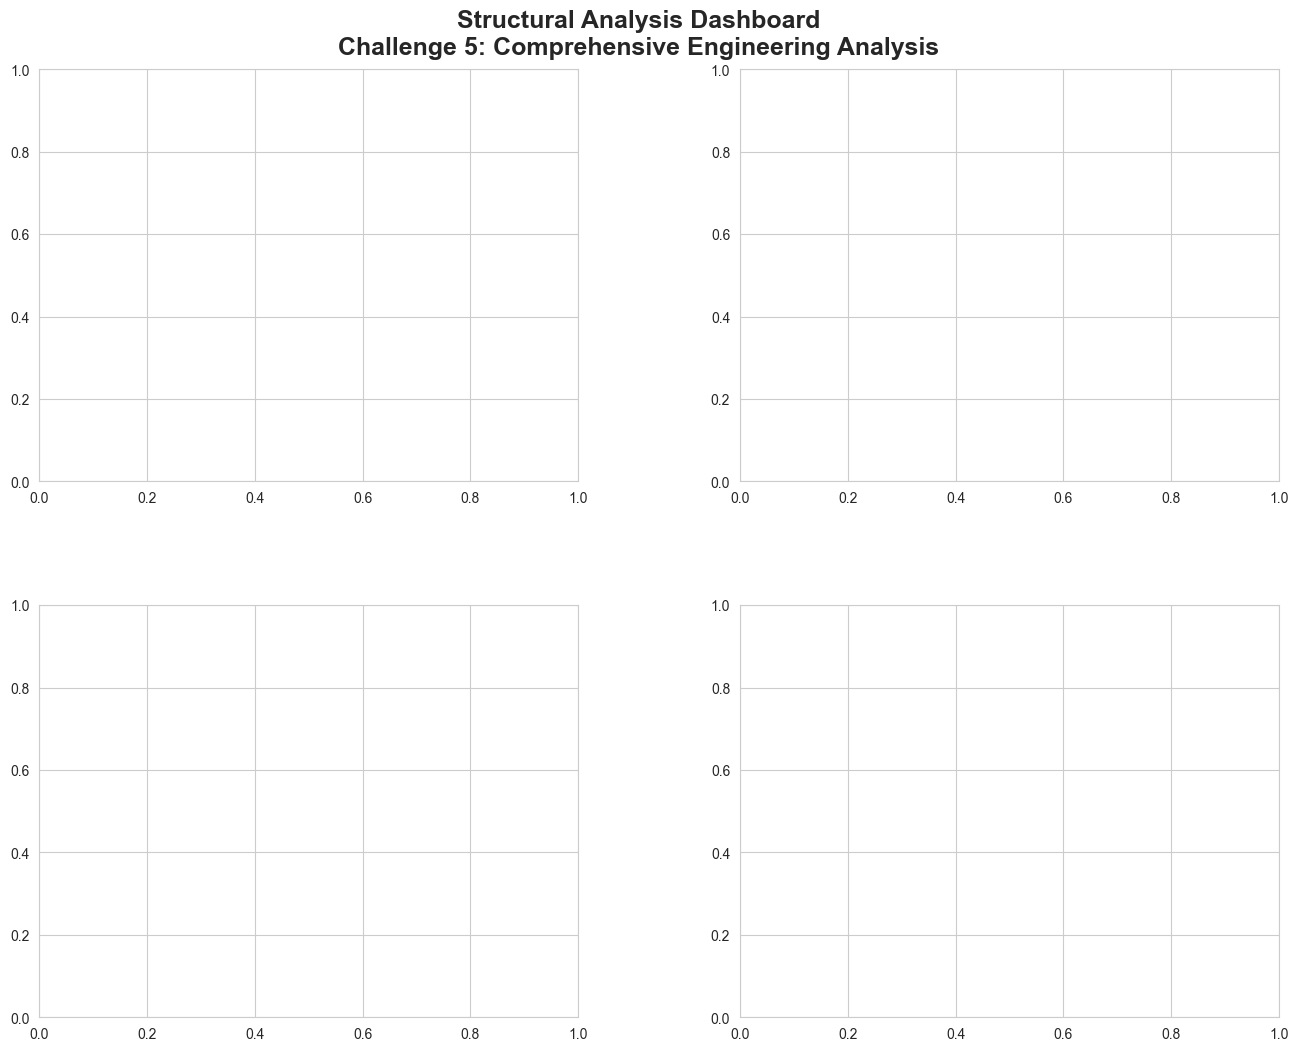

In [11]:
# Create the comprehensive 2x2 structural analysis dashboard
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Structural Analysis Dashboard\nChallenge 5: Comprehensive Engineering Analysis', 
             fontsize=18, fontweight='bold', y=0.95)

# Set overall spacing
plt.subplots_adjust(hspace=0.3, wspace=0.3, top=0.9)

print("🏗️ Creating comprehensive structural analysis dashboard...")
print("📊 Setting up 2x2 subplot layout...")


In [12]:
# SUBPLOT 1: Load-Displacement Curve (matplotlib)
ax1 = axes[0, 0]

# Plot the main curve
ax1.plot(displacement, load, linewidth=3, color='#2E86AB', label='Load-Displacement Curve')

# Mark the yield point at displacement=5mm
yield_displacement = 5
yield_load = 50 * yield_displacement - 2 * yield_displacement**2
ax1.plot(yield_displacement, yield_load, 'ro', markersize=12, label=f'Yield Point ({yield_displacement} mm)')

# Add a vertical line at the yield point
ax1.axvline(x=yield_displacement, color='red', linestyle='--', alpha=0.7, linewidth=2)

# Customize subplot 1
ax1.set_xlabel('Displacement (mm)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Load (N)', fontsize=12, fontweight='bold')
ax1.set_title('Load-Displacement Curve', fontsize=14, fontweight='bold', pad=15)
ax1.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
ax1.legend(fontsize=10, loc='upper right')
ax1.set_xlim(0, 10)
ax1.set_ylim(0, max(load) * 1.1)

print("✅ Subplot 1: Load-displacement curve created")


✅ Subplot 1: Load-displacement curve created


In [13]:
# SUBPLOT 2: Material Strength Distribution (seaborn histogram)
ax2 = axes[0, 1]

# Create DataFrame for seaborn
df_materials = pd.DataFrame({
    'Strength (MPa)': all_strengths,
    'Material': material_labels
})

# Create histogram using seaborn
sns.histplot(data=df_materials, x='Strength (MPa)', hue='Material', 
             ax=ax2, alpha=0.7, kde=True, palette=['#E74C3C', '#3498DB', '#2ECC71'])

# Customize subplot 2
ax2.set_xlabel('Strength (MPa)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax2.set_title('Material Strength Distribution', fontsize=14, fontweight='bold', pad=15)
ax2.grid(True, alpha=0.3, axis='y')
ax2.legend(title='Material Type', title_fontsize=10, fontsize=9, loc='upper right')

print("✅ Subplot 2: Material strength histogram created")


✅ Subplot 2: Material strength histogram created


In [14]:
# SUBPLOT 3: Correlation Heatmap of Structural Properties (seaborn)
ax3 = axes[1, 0]

# Calculate correlation matrix
correlation_matrix = df_structural.corr()

# Create heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0,
            square=True, ax=ax3, cbar_kws={'shrink': 0.8},
            fmt='.2f', annot_kws={'size': 9})

# Customize subplot 3
ax3.set_title('Structural Properties Correlation', fontsize=14, fontweight='bold', pad=15)
ax3.set_xlabel('Properties', fontsize=12, fontweight='bold')
ax3.set_ylabel('Properties', fontsize=12, fontweight='bold')

# Rotate x-axis labels for better readability
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')
ax3.set_yticklabels(ax3.get_yticklabels(), rotation=0)

print("✅ Subplot 3: Correlation heatmap created")


✅ Subplot 3: Correlation heatmap created


In [15]:
# SUBPLOT 4: Stress Distribution Contour Plot (matplotlib)
ax4 = axes[1, 1]

# Create contour plot
contour = ax4.contour(X, Y, stress_distribution, levels=15, colors='black', alpha=0.6, linewidths=0.8)
contour_filled = ax4.contourf(X, Y, stress_distribution, levels=15, cmap='viridis', alpha=0.8)

# Add colorbar
cbar = plt.colorbar(contour_filled, ax=ax4, shrink=0.8)
cbar.set_label('Stress (MPa)', fontsize=11, fontweight='bold')

# Mark stress concentration points
max_stress_idx = np.unravel_index(np.argmax(stress_distribution), stress_distribution.shape)
ax4.plot(X[max_stress_idx], Y[max_stress_idx], 'r*', markersize=15, label='Max Stress')

# Customize subplot 4
ax4.set_xlabel('X Position (m)', fontsize=12, fontweight='bold')
ax4.set_ylabel('Y Position (m)', fontsize=12, fontweight='bold')
ax4.set_title('Stress Distribution Contour', fontsize=14, fontweight='bold', pad=15)
ax4.grid(True, alpha=0.3)
ax4.legend(fontsize=10, loc='upper right')
ax4.set_aspect('equal')

print("✅ Subplot 4: Stress distribution contour plot created")


✅ Subplot 4: Stress distribution contour plot created


<Figure size 640x480 with 0 Axes>

In [16]:
# Finalize and display the dashboard
plt.tight_layout()
plt.show()

# Print comprehensive summary
print("\n" + "="*70)
print("🏆 CHALLENGE 5 COMPLETE! 🏆")
print("="*70)
print("📊 Structural Analysis Dashboard Summary:")
print("   ✅ 2x2 subplot layout created")
print("   ✅ Subplot 1: Load-displacement curve (matplotlib)")
print("   ✅ Subplot 2: Material strength distribution (seaborn histogram)")
print("   ✅ Subplot 3: Correlation heatmap of structural properties")
print("   ✅ Subplot 4: Stress distribution contour plot")
print("   ✅ Overall title and proper spacing applied")
print("   ✅ Both matplotlib and seaborn used in the same figure")

print(f"\n📈 Dashboard Statistics:")
print(f"   Load-displacement curve: {len(displacement)} data points")
print(f"   Material samples: {len(all_strengths)} total samples")
print(f"   Structural properties: {len(df_structural.columns)} properties analyzed")
print(f"   Stress distribution: {X.shape[0]}x{X.shape[1]} grid points")

print(f"\n🎯 Key Insights:")
print(f"   • Maximum load: {max(load):.2f} N at {displacement[np.argmax(load)]:.2f} mm displacement")
print(f"   • Steel strength: {np.mean(steel_strength):.1f} ± {np.std(steel_strength):.1f} MPa")
print(f"   • Concrete strength: {np.mean(concrete_strength):.1f} ± {np.std(concrete_strength):.1f} MPa")
print(f"   • Composite strength: {np.mean(composite_strength):.1f} ± {np.std(composite_strength):.1f} MPa")
print(f"   • Maximum stress concentration: {np.max(stress_distribution):.1f} MPa")

print("\n🎉 Comprehensive structural analysis dashboard generated successfully!")
print("🏆 First team to show the complete dashboard wins Challenge 5!")
print("="*70)


<Figure size 640x480 with 0 Axes>


🏆 CHALLENGE 5 COMPLETE! 🏆
📊 Structural Analysis Dashboard Summary:
   ✅ 2x2 subplot layout created
   ✅ Subplot 1: Load-displacement curve (matplotlib)
   ✅ Subplot 2: Material strength distribution (seaborn histogram)
   ✅ Subplot 3: Correlation heatmap of structural properties
   ✅ Subplot 4: Stress distribution contour plot
   ✅ Overall title and proper spacing applied
   ✅ Both matplotlib and seaborn used in the same figure

📈 Dashboard Statistics:
   Load-displacement curve: 100 data points
   Material samples: 600 total samples
   Structural properties: 6 properties analyzed
   Stress distribution: 50x50 grid points

🎯 Key Insights:
   • Maximum load: 300.00 N at 10.00 mm displacement
   • Steel strength: 49.8 ± 4.6 MPa
   • Concrete strength: 30.3 ± 3.0 MPa
   • Composite strength: 39.7 ± 4.0 MPa
   • Maximum stress concentration: 37.2 MPa

🎉 Comprehensive structural analysis dashboard generated successfully!
🏆 First team to show the complete dashboard wins Challenge 5!
